# Quandl - API Demo

Quandl uses a very straightforward API to make its free and premium data available. Currently, 50 anonymous calls are allowed, then a (free) API key is required. See [documentation](https://www.quandl.com/tools/api) for more details.

In [1]:
%matplotlib inline
import os
import quandl

import seaborn as sns
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
sns.set_style('whitegrid')

In [3]:
api_key = os.environ['QUANDL_API_KEY']
oil = quandl.get('EIA/PET_RWTC_D', api_key=api_key).squeeze()

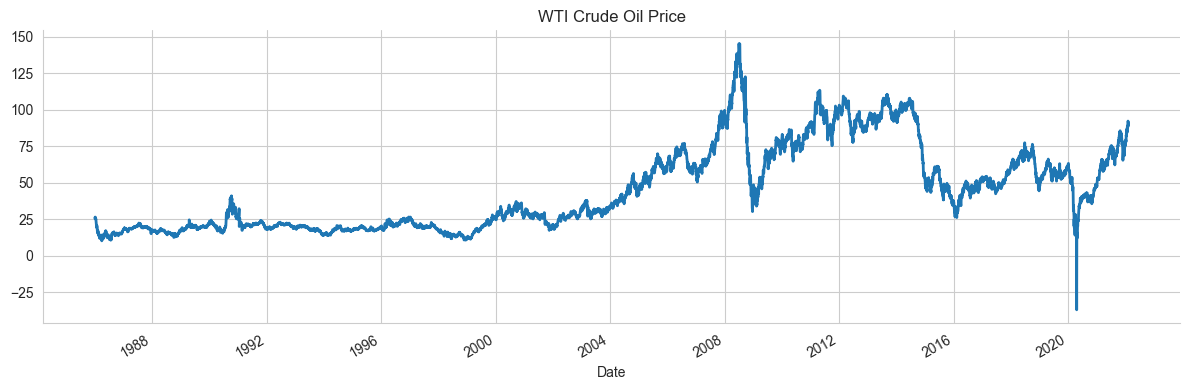

In [4]:
oil.plot(lw=2, title='WTI Crude Oil Price', figsize=(12, 4))
sns.despine()
plt.tight_layout();